In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error,r2_score
import fileinput
import operator
import math
import random
import matplotlib.pyplot as plt

#Fit the code to the screen
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

### Reading User Movie and Ratings

[3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.69248291572, 3.6924829

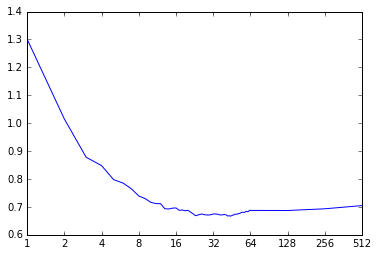

In [16]:
#Reading the movies data
my_path = !pwd


rand_mse = 3.69248291572


users = [1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
128,
256,
512,
1024,
2048,
4096,
]

rand = [rand_mse for i in x]
print rand


mse=[1.3006833713,
1.01480637813,
0.878005568211,
0.847949886105,
0.797813211845,
0.784864591243,
0.764120682442,
0.739108769932,
0.729829297787,
0.716445063135,
0.711854050502,
0.711609578447,
0.69329629846,
0.692505042355,
0.695557459039,
0.6962886426,
0.687780215487,
0.688859857869,
0.686094838334,
0.687877535095,
0.681048367589,
0.675382570958,
0.668391419977,
0.670716810548,
0.673086944691,
0.674682550627,
0.67210651967,
0.671294680268,
0.670974951972,
0.671141396386,
0.672789773185,
0.674449428745,
0.674986119261,
0.674128191215,
0.673887609387,
0.671526905044,
0.671269332783,
0.671375158686,
0.672515063985,
0.672393490576,
0.670605419525,
0.66709770909,
0.668256195311,
0.666946650279,
0.668301863905,
0.670484961609,
0.671064422617,
0.673901896597,
0.673992838935,
0.673732354076,
0.675962792167,
0.676225888332,
0.677510067268,
0.679815654756,
0.680883565507,
0.680803767539,
0.680484190667,
0.681225302865,
0.683999124417,
0.683852736399,
0.68257433325,
0.684323141816,
0.687912868425,
0.687378742474,
0.687114877944,
0.693227623867,
0.704717151869,
0.710002812248,
0.714395885942,
0.7149141051]
fig, ax = plt.subplots()
plt.xlim(xmin=1,xmax=512)   
ax.set_xscale('log', basex=2)
plt.xticks([1,2,4,8,16,32,64,128,256,512],["1","2","4","8","16","32","64","128","256","512"])
           
    
plt.plot(users,mse)


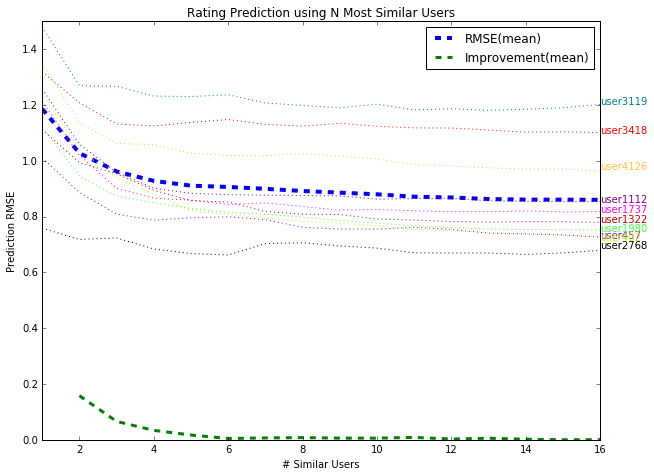

In [89]:
my_path = !pwd
errors = dict()
num_users_set = set()
for line in fileinput.input("user_similarity_errors_per_user.txt"):
    fields = line.split(' ')
    num_users = int(fields[0])
    userId  = int(fields[1])
    error = math.sqrt(float(fields[3]))
    num_users_set.add(num_users)
    if userId not in errors:
        errors[userId]=[]
    errors[userId].append(error)

fig, ax = plt.subplots()
fig.set_size_inches(10,7.5)
x = list(num_users_set)
x = sorted(x)
all_errors = []
for userId in errors:
    for i in range(len(errors[userId])):
        while i>= len(all_errors):
            all_errors.append([])
        all_errors[i].append(errors[userId][i])
average = []        
std = []
max_err = []
min_err = []
improvement = []
for i in range(len(all_errors)):    
    average.append(np.mean(all_errors[i]))
    std.append(np.std(all_errors[i]))
    max_err.append(max(all_errors[i]))
    min_err.append(min(all_errors[i]))
    if i==0:
        improvement.append(0)
    else:
        improvement.append(average[i-1]-average[i])
plt.xlim(xmin=min(x),xmax=16) 

plt.ylim(ymin=0,ymax=1.5) 
plt.plot(x,average,linewidth=4,linestyle = "--")
plt.plot(x[1:],improvement[1:],linewidth=3,linestyle = "--")
colors = ["#8000ff","#c00000","#008080","#000000","#c0ff00","#ff00ff","#800080","#ff0000","#40ff40","#ffc040"]
i=0
for userId in errors:
    plt.plot(x,errors[userId],color = colors[i],linestyle=":")
    ax.text(16,errors[userId][16],"user{0}".format(userId),color=colors[i])
    i+=1
plt.legend(labels =["RMSE(mean)","Improvement(mean)"])    
plt.title("Rating Prediction using N Most Similar Users")
plt.xlabel("# Similar Users")
plt.ylabel("Prediction RMSE")
plt.savefig("user_similarity.pdf")
#plt.plot(x,std)
#plt.plot(x,max_err)
#plt.plot(x,min_err)


In [ ]:
global_similarity_dict = dict()

def set_global_similarity_dict(userId,user_features,similarity_features):
    #print user_features[user_features["userId"]==5530]
    #print user_features[user_features["userId"]==2106]
    similarity_dict=dict()
    users_to_chose_from = user_features
    for simliarity_userId in users_to_chose_from["userId"].unique():
        if userId!=simliarity_userId:
            similarity_dict[simliarity_userId] = cosine_similarity(user_features,userId,simliarity_userId,similarity_features)
    sorted_dict = sorted(similarity_dict.items(), key=operator.itemgetter(1)) 
    sorted_dict.reverse()
    ids =[]
    for items in sorted_dict:
        ids.append(items[0])
    global_similarity_dict[userId] = ids
tested_userIds = [457,2768,1980,402,4126,3418,1112,3119,1737,1322]
for tested_userId in tested_userIds:
    set_global_similarity_dict(tested_userId,user_features,similarity_features)   

In [ ]:
print global_similarity_dict 

In [ ]:
#USER SIMILARITY_FUNCTIONS

N_MOST_SIMILAR=10
def cosine_similarity(user_features,userId1,userId2,similarity_features):
    user1 = user_features[user_features["userId"] == userId1][similarity_features]
    user2 = user_features[user_features["userId"] == userId2][similarity_features]
    sim = np.dot(user1,user2.T)/np.linalg.norm(user1)/np.linalg.norm(user2)
    return sim[0][0]
    
global_similarity_dict = dict()
#returns the 'n' most similar users to 'userId' according to 'similarity_features'. 
#If 'predicted_movieId' is not 'None' we restrict the users to chose from only to users that rated the movie 
def n_most_similar(n,userId,user_features,similarity_features,predicted_movieId=None):
    #print user_features[user_features["userId"]==5530]
    #print user_features[user_features["userId"]==2106]
    users_to_chose_from = user_features
    if predicted_movieId!=None:
        users_to_chose_from = dfratings[dfratings["movieId"]==predicted_movieId]
    similarity_dict = dict()
    for simliarity_userId in users_to_chose_from["userId"].unique():
        if userId!=simliarity_userId:
            similarity_dict[simliarity_userId] = cosine_similarity(user_features,userId,simliarity_userId,similarity_features)
            #print simliarity_userId, similarity_dict[simliarity_userId]
    sorted_dict = sorted(similarity_dict.items(), key=operator.itemgetter(1)) 
    sorted_dict.reverse()
    ids =[]
    for items in sorted_dict[:min(n,len(sorted_dict)-1)]:
        ids.append(items[0])
    return ids


user_genre_pref_filename = '/explore/user_genre_pref.pik'
user_genre_pref = pickle.load(open(my_path[0]+user_genre_pref_filename, 'rb'))
similarity_features = list(user_genre_pref.columns)
similarity_features.append("rate_num")
similarity_features.append("rate_avg")
similarity_features.append("rate_std")  
similarity_features.append("avg_score_diff")
random_seed = 42
#print user_features["userId"][0]
MAX_SIMILAR_USERS=10
predictions = []

tested_userIds = [457,2768,1980,402,4126,3418,1112,3119,1737,1322]
#tested_userIds = [457,2768,1980]
ratings_pred = []
ratings_real = []
for n in range(1,MAX_SIMILAR_USERS):
    ratings_pred.append([])
    ratings_real.append([])    

       




In [ ]:
def n_most_similar_global(n,userId,user_features,similarity_features,predicted_movieId=None):
    #print user_features[user_features["userId"]==5530]
    #print user_features[user_features["userId"]==2106]
    all_similar_ids = global_similarity_dict[userId]
    users_to_chose_from = user_features
    if predicted_movieId!=None:
        users_to_chose_from = dfratings[dfratings["movieId"]==predicted_movieId]
    valid_user_ids = users_to_chose_from["userId"].unique()        
    ids =[]
    i=0
    for similar_id in all_similar_ids:
        if similar_id in valid_user_ids:
            i+=1
            if i>n:
                break
            ids.append(similar_id)
    return ids
ratings_pred = []
for n in range(33,64):
    while n >= len(ratings_pred):
        ratings_pred.append([])
    ratings_pred[n-1]=[]
    for tested_userId in tested_userIds:
            user_ratings = dfratings[dfratings["userId"]==tested_userId]
            user_ratings.reset_index(inplace=True)
            user_ratings_shuffle_indices = cross_validation.ShuffleSplit(len(user_ratings), n_iter=1, test_size=0.1, random_state=random_seed)
            for dummy_train_indices,user_ratings_test_indices in user_ratings_shuffle_indices:
                predicted_movieIds = (user_ratings["movieId"])[user_ratings_test_indices]
                for predicted_movieId in predicted_movieIds:
                    n_similar_userIds = n_most_similar_global(n,tested_userId,user_features,similarity_features,predicted_movieId)
                    similar_ratings = []
                    for similar_userId in n_similar_userIds:
                        similar_user_ratings = dfratings[dfratings["userId"]==similar_userId]
                        similar_movie_rating = similar_user_ratings[similar_user_ratings["movieId"] == predicted_movieId]["rating"]
                        similar_ratings.append(similar_movie_rating.item())
                    user_rating = dfratings[dfratings["userId"]==tested_userId]
                    user_movie_rating = user_rating[user_rating["movieId"] == predicted_movieId]["rating"]                    
                    predict = float(sum(similar_ratings))/float(len(similar_ratings))
                    #print n,len(ratings_pred)
                    ratings_pred[n-1].append(predict)
                    #ratings_real[n-1].append(user_movie_rating.item())
    with open(my_path[0]+'/ratings_pred{0}.pik'.format(n), 'wb') as handle:
        pickle.dump(ratings_pred, handle, protocol=pickle.HIGHEST_PROTOCOL)                    
        print n,mean_squared_error(ratings_pred[n-1],ratings_real[0]),r2_score(ratings_pred[n-1],ratings_real[0])

In [ ]:
ratings_rand=[]
for i in range(len(ratings_real[0])):
    ratings_rand.append(random.randint(1,5))
print "random",mean_squared_error(ratings_rand,ratings_real[0]),r2_score(ratings_rand,ratings_real[0])    

In [ ]:
ratings_pred = pickle.load(open(my_path[0]+"/ratings_pred9.pik", 'rb'))
ratings_real = pickle.load(open(my_path[0]+"/ratings_real1.pik", 'rb'))
#print ratings_real,ratings_pred
for n in range(1,10):
    while n >= len(ratings_pred):
        ratings_pred.append([])
    ratings_pred[n-1]=[]
    for tested_userId in tested_userIds:
            user_ratings = dfratings[dfratings["userId"]==tested_userId]
            user_ratings.reset_index(inplace=True)
            user_ratings_shuffle_indices = cross_validation.ShuffleSplit(len(user_ratings), n_iter=1, test_size=0.1, random_state=random_seed)
            for dummy_train_indices,user_ratings_test_indices in user_ratings_shuffle_indices:
                predicted_movieIds = (user_ratings["movieId"])[user_ratings_test_indices]
                for predicted_movieId in predicted_movieIds:
                    n_similar_userIds = n_most_similar(n,tested_userId,user_features,similarity_features,predicted_movieId)
                    similar_ratings = []
                    for similar_userId in n_similar_userIds:
                        similar_user_ratings = dfratings[dfratings["userId"]==similar_userId]
                        similar_movie_rating = similar_user_ratings[similar_user_ratings["movieId"] == predicted_movieId]["rating"]
                        similar_ratings.append(similar_movie_rating.item())
                    user_rating = dfratings[dfratings["userId"]==tested_userId]
                    user_movie_rating = user_rating[user_rating["movieId"] == predicted_movieId]["rating"]                    
                    predict = float(sum(similar_ratings))/float(len(similar_ratings))
                    #print n,len(ratings_pred)
                    ratings_pred[n-1].append(predict)
                    #ratings_real[n-1].append(user_movie_rating.item())
    with open(my_path[0]+'/ratings_pred{0}.pik'.format(n), 'wb') as handle:
        pickle.dump(ratings_pred, handle, protocol=pickle.HIGHEST_PROTOCOL)                    
        print n,mean_squared_error(ratings_pred[n-1],ratings_real[0]),r2_score(ratings_pred[n-1],ratings_real[0])
      

### Reading ratings data

In [ ]:
#Reading the ratings data
ratings_filename = "/ml-1m/ratings.dat"
dfratings = pd.read_csv(my_path[0]+ratings_filename, index_col=None, sep='::', header=None)
dfratings.columns = ["userId", "movieId", "rating", "timestamp"]

## Creating genres vector for each movie

In [ ]:
#Disable false positive Pandas warning for 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Adding genres vector to each movie
all_genres = ['Mystery', 'Sci-Fi', 'Crime', 'Drama', 'Animation', 'IMAX', 'Action', 'Comedy', 'Documentary', 'War', 'Romance', 'Horror', 
              'Film-Noir', 'Musical', 'Fantasy', 'Adventure', 'Children', 'Thriller', 'Western']
for genre in all_genres:
    dfmovies[genre] = dfmovies['genres'].apply(lambda x: x.find(genre)>=0).astype(int)

## Create users genre preference vectors

In [ ]:
users = (dfratings["userId"]).unique()
genres_pref = []
for userId in users:
    user_ratings = dfratings[dfratings["userId"] == userId]
    movies_total = 0
    geners_rating_score = [0] * len(all_genres)
    for index, rating in user_ratings.iterrows():
        movieId = rating["movieId"]
        score = rating["rating"]
        movie_data = dfmovies.loc[dfmovies["movieId"] == movieId]
        for genre in all_genres:
            if (movie_data[genre].item() == 1):
                geners_rating_score[all_genres.index(genre)] += score
    genres_pref.append(geners_rating_score)
    if (userId % 1000 == 0):
        print userId

In [ ]:
#Save the genres prefrence to dataframe and to pickle
user_pref_df = pd.DataFrame(genres_pref)
user_pref_df.columns = all_genres
with open(my_path[0]+'/explore/user_genre_pref.pik', 'wb') as handle:
    pickle.dump(user_pref_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(my_path[0]+'/explore/user_genre_pref.pik', 'rb') as handle:
    user_pref_df = pickle.load(handle)

## Unify all the users features

### Reading the users data

In [ ]:
users_filename = "/ml-1m/users.dat"
dfusers = pd.read_csv(my_path[0]+users_filename, sep='::', header=None)
dfusers.columns = ["userId","gender", "age", "occupation", "zip-code"]

In [ ]:
#Extracting gender, age and occupation features
del dfusers["zip-code"]
user_features = dfusers.join(user_pref_df)

In [ ]:
#Calculating number of ratings and average rating per user
users = (dfratings["userId"]).unique()
user_rate_num = []
user_rate_avg = []
user_rate_std = []
for userId in users:
    user_ratings = dfratings[dfratings["userId"] == userId]
    user_rate_num.append(user_ratings.shape[0])
    user_rate_avg.append(np.average(user_ratings["rating"]))
    user_rate_std.append(np.std(user_ratings["rating"]))

In [ ]:
user_features["rate_num"] = user_rate_num
user_features["rate_avg"] = user_rate_avg
user_features["rate_std"] = user_rate_std

In [ ]:
with open(my_path[0]+'/features/user_features.pik', 'wb') as handle:
    pickle.dump(user_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(my_path[0]+'/features/user_features.pik', 'rb') as handle:
    user_features = pickle.load(handle)

### Calculate movies features

In [ ]:
#Calculate average rating and number of ratings
all_movies = dfmovies["movieId"]
avg_rate = []
num_rate = []
std_rate = []
for movie in all_movies:
    movie_data = dfratings[dfratings["movieId"] == movie]
    num_rate.append(movie_data.shape[0])
    avg_rate.append(np.average(movie_data["rating"]))
    std_rate.append(np.std(movie_data["rating"]))

In [ ]:
#Removing movies with 0 reviews
movies_features = dfmovies.copy(deep=True)
exclude_movies = []
for i in sorted(all_movies.index, reverse=True):
    if (num_rate[i] == 0):
        exclude_movies.append(all_movies[i])
        del avg_rate[i]
        del num_rate[i]
        movies_features.drop(movies_features.index[i], inplace=True)

## Unify all movies features

In [ ]:
del movies_features["genres"]
movies_features["avg_rate"] = avg_rate
movies_features["num_rate"] = num_rate
movies_features["std_rate"] = std_rate

In [ ]:
with open(my_path[0]+'/features/movie_features.pik', 'wb') as handle:
    pickle.dump(movies_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
cross_validation.ShuffleSplit(len(user_features), n_iter=1, test_size=.01, random_state=random_seed)
user_features["userId"][userId_shuffle_index]

In [ ]:
#ratings_pred = pickle.load(open(my_path[0]+"/ratings_pred63.pik", 'rb'))
#ratings_real = pickle.load(open(my_path[0]+"/ratings_real1.pik", 'rb'))

for i in range(len(ratings_pred)):
    if len(ratings_pred[i]) ==len(ratings_real[0]):
        print i+1,mean_squared_error(ratings_pred[i],ratings_real[0]),r2_score(ratings_pred[i],ratings_real[0])